## Multilevel Modelling with Rstanarm

This notebook contains the basic syntax for running multilevel models using teh Rstanarm package in R.

The syntax should eb used in conjuction with the short videos on the course Learn site which will talk you though the syntax and the basics of interpreting the output.

The syntax includes examples of variance compoenent models, random intercept models and random slope models.  Each of these models will be estimated for a continuous outcome and a binary outcome.  The logic of the syntax presented can be expanded to any outcome variable supported by Rstanarm (notable count models and ordinal outcomes).  Those interested in how to estimate models for such outcomes are encouraged to consult the Rstanarm documentation at https://cran.r-project.org/web/packages/rstanarm/rstanarm.pdf 

A fuller version of the syntax of models with continuous outcomes can be found at https://mc-stan.org/users/documentation/case-studies/tutorial_rstanarm.html

Two datasets will be used.  For the continuous outcome, the "Gcsemv" dataset from the "mlmRev" package.  This dataset concerns the academic preformance of 1,905 students from 73 schools in England, in a GCSE science subject.  The following variables are included in the dataset:-

    school School ID - a factor identifying which school the student attended
    student Student ID - a factor giving each student an ID within there school
    gender - a factor recording the gender of student
    written - a continuous variable recording the student's total score on written paper
    course - a continuous variable recording the student's total score on coursework paper
    
Full details of this dataset, which is commonly used for comparing multilevel modelling software can be found at http://www.bristol.ac.uk/cmm/learning/mmsoftware/data-rev.html#gcsemv

The dataset is installed using the syntax below.

In [ ]:
install.packages("mlmRev")
library(mlmRev)
data(Gcsemv, package = "mlmRev")
summary(Gcsemv)

The following commands set "Male" to the reference category for the "Gender variable" and create a new dataframe called "GCSE" which includes both the recoded variable rlating to gender and excludes the exam score variable, i.e. this session will concentrate on coursework grades.

In [ ]:
# Make Male the reference category and rename variable
Gcsemv$female <- relevel(Gcsemv$gender, "M")


# Use only total score on coursework paper 
GCSE <- subset(x = Gcsemv, 
               select = c(school, student, female, course))

# Check structure of data frame
str(GCSE)

When considering binary outcomes, the  Bangladesh Demographic and Health Survey 2004 will be used.

The response variable (antemed) is a binary indicator of whether a woman received antenatal care from a medically-trained provider (a doctor, nurse or midwife) at least once before her most recent live birth.  

In this practical, multilevel models are used to allow for and to explore between-community variance in antenatal care. The data have a two-level hierarchical structure with 5366 women at level 1, nested within 361 communities at level 2. In rural areas a community corresponds to a village, while an urban community is a neighbourhood based on census definitions.

A range of predictorvariables will be considered. At level 1, variables such as a woman’s age at the time of the birth and education. Level 2 variables include an indicator of whether the region of residence is classified as urban or rural.  Further community-level measures can be derived by aggregating woman-level variables, for example the proportion of respondents in the community who are in the top quintile of a wealth index. 

The file contains the following variables:

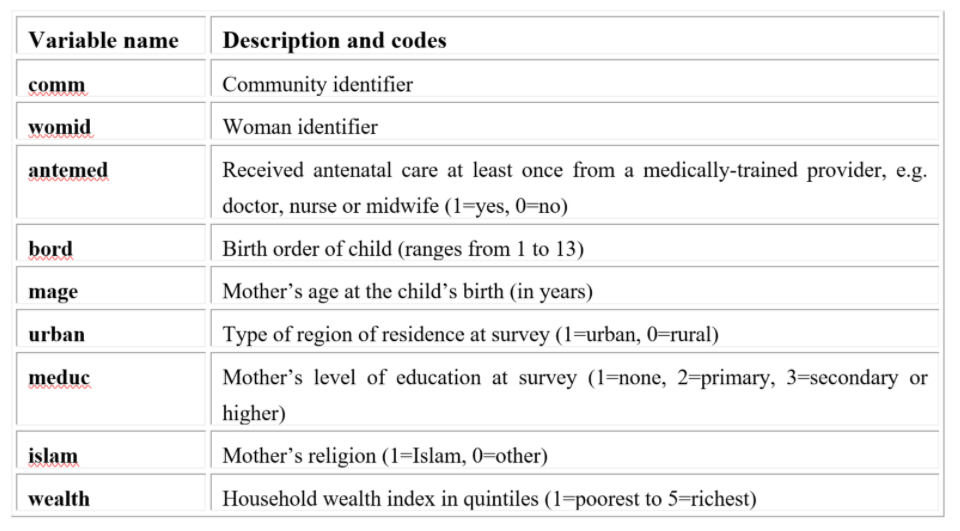

This dataset is stored in the Stata data file "antenatal.dta".  It is loaded using the syntax below, where the last command ensures that the variable "comm", which identifies the community in which each woman lives, is treated as a factor variable 

In [ ]:
library (foreign)
bang <- read.dta ("antenatal.dta")
bang$comm <- as.factor (bang$comm)

In [ ]:
summary (bang) # check the file has laoded corrected by viewing descriptive statistics

### Running Null (or VPC) Models

The package "lme4" is used to run multilevel models in a traditional frequentist way, these are used as a basis against which to compare the models estimated using MCMC methods.

The package "rstanarm" is needed to estimate multilevel models using MCMC methods (as implemented by MC-Stan - see https://mc-stan.org/

The package "Bayesplot" is used to view diagnostic plots associated with MCMC estimation to ensure models have successfully converged.

In [ ]:
library(lme4)
library(rstanarm)
library (bayesplot)

#### Estimating a VPC Model for a Continuous Outcome Using LME4

In [ ]:
gcsenull <- lmer (course~1+(1|school), data=GCSE)
summary (gcsenull)

#### Estimating a VPC Model for a Continuous Outcome Using RStanarm

In [ ]:
M1_stanlmer <- stan_lmer(formula = course ~ 1 + (1 | school), 
                         data = GCSE,
                         seed = 349)

In [ ]:
mcmc_hist (M1_stanlmer,  pars = c("sigma", "(Intercept)"))

In [ ]:
mcmc_trace (M1_stanlmer, , pars = c("sigma", "(Intercept)"))

In [ ]:
mcmc_acf (M1_stanlmer, , pars = c("sigma", "(Intercept)"))

In [ ]:
M1b_stanlmer <- stan_lmer(formula = course ~ 1 + (1 | school), 
                         data = GCSE, iter = 5000, warmup=2000, thin=10,
                         seed = 349)

In [ ]:
mcmc_acf (M1b_stanlmer, , pars = c("sigma", "(Intercept)"))

In [ ]:
summary (M1b_stanlmer)

In [ ]:
print(M1b_stanlmer, digits = 2)

#### Estimating a VPC Model for a Binary Outcome Using LME4

In [ ]:
binnull <- glmer (antemed~1+(1|comm), data=bang, family=binomial)
summary (binnull)

#### Estimating a VPC Model for a Binary Outcome Using Rstanarm

In [ ]:
BINM1_stanglmer <- stan_glmer(formula = antemed~1+(1|comm), family = binomial(link = "logit"), 
                         data = bang, iter = 5000, warmup=2000, thin=10,
                         seed = 349)

In [ ]:
mcmc_hist (BINM1_stanglmer, pars = c("(Intercept)"))

In [ ]:
mcmc_trace (BINM1_stanglmer, pars = c("(Intercept)"))

In [ ]:
mcmc_acf (BINM1_stanglmer, pars = c("(Intercept)"))

In [ ]:
print(BINM1_stanglmer, digits = 2)

#### Estimating a Random Intercept Model for a Continuous Outcome Using LME4

In [ ]:
gcseri <- lmer (course~female+(1|school), data=GCSE)
summary (gcseri)

#### Estimating a Random Intercept Model for a Continuous Outcome Using Rstanarm

In [ ]:
M2_stanlmer <- stan_lmer(formula = course ~ female + (1 | school), data = GCSE, iter = 5000, warmup=2000, thin=10, seed = 349)

In [ ]:
print(M2_stanlmer, digits = 2)

#### Estimating a Random Intercept Model for a Binary Outcome Using LME4

In [ ]:
ri1 <- glmer (antemed~ 1+islam + (1|comm), data=bang, family=binomial)
summary (ri1)

#### Estimating a Random Intercept Model for a Binary Outcome Using RStanarm

In [ ]:
BINM2_stanglmer <- stan_glmer(formula = antemed~islam+(1|comm), family = binomial(link = "logit"), 
                         data = bang, iter = 5000, warmup=2000, thin=10,
                         seed = 349)

In [ ]:
print(BINM2_stanglmer, digits = 2)

#### Estimating a Random Slope Model for a Continuous Outcome Using LME4

In [ ]:
gcseri <- lmer (course~female+(1 + female|school), data=GCSE)
summary (gcseri)

#### Estimating a Random Slope Model for a Continuous Outcome Using Rstanarm

In [ ]:
M3_stanlmer <- stan_lmer(formula = course ~ female + (1 + female | school), 
                            data = GCSE, iter = 5000, warmup=2000, thin=10, seed = 349)

In [ ]:
print(M3_stanlmer, digits = 2)

#### Estimating a Random Slope Model for a Binary Outcome Using LME4

In [ ]:
ri2 <- glmer (antemed~ 1+islam + (1+islam|comm), data=bang, family=binomial)
summary (ri2)

#### Estimating a Random Slope Model for a Binary Outcome Using Rstanarm

In [ ]:
BINM3_stanglmer <- stan_glmer(formula = antemed~islam+(1+islam|comm), family = binomial(link = "logit"), 
                         data = bang, iter = 5000, warmup=2000, thin=10,
                         seed = 349)

In [ ]:
print(BINM3_stanlmer, digits = 2)